In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [24]:
buffer_gdf = gpd.read_file('data/processing/buffers.shp')

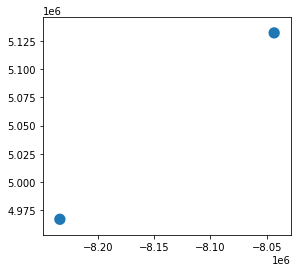

In [25]:
buffer_gdf.plot()

In [26]:
tracts_file = gpd.read_file(
    f"data/processing/tl_2019_36_tract_pop.shp"
)

In [27]:
# for index, row in buffer_gdf.iterrows()

df = buffer_gdf[buffer_gdf.index == 0]

df

,address,GEOID,geometry
0,"200 Willoughby Ave, Brooklyn, NY 11205",36,"POLYGON ((-8228525.315 4966920.178, -8228549.3..."


In [28]:
gdf = gpd.overlay(
    df,
    tracts_file, # .to_crs(epsg=3857),
    how='intersection',
)

In [31]:
gdf

,address,GEOID_1,STATEFP,COUNTYFP,TRACTCE,GEOID_2,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,B01003_001,state,county,tract,orig_area,geometry
0,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,050100,36047050100,501,Census Tract 501,G5020,S,172687,0,+40.7157350,-073.9489203,3157.0,36,047,050100,300894.160419,"POLYGON ((-8232449.598 4970274.838, -8232382.9..."
1,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,055300,36047055300,553,Census Tract 553,G5020,S,156271,0,+40.7164576,-073.9592358,2761.0,36,047,055300,272297.411688,"POLYGON ((-8233444.349 4970479.863, -8233402.3..."
2,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,055500,36047055500,555,Census Tract 555,G5020,S,261667,0,+40.7180846,-073.9632608,6431.0,36,047,055500,455969.435749,"POLYGON ((-8233950.519 4970771.253, -8233932.1..."
3,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,047700,36047047700,477,Census Tract 477,G5020,S,217805,0,+40.7182181,-073.9421366,3816.0,36,047,047700,379537.431779,"POLYGON ((-8231209.625 4971349.315, -8231168.3..."
4,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,061,002201,36061002201,22.01,Census Tract 22.01,G5020,S,161668,0,+40.7191156,-073.9818443,6484.0,36,061,002201,281719.119413,"POLYGON ((-8235914.306 4971163.557, -8235841.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,080400,36047080400,804,Census Tract 804,G5020,S,189757,0,+40.6589744,-073.9489902,3217.0,36,047,080400,330076.970352,"POLYGON ((-8231806.876 4962231.016, -8232073.8..."
245,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,081000,36047081000,810,Census Tract 810,G5020,S,162414,0,+40.6591131,-073.9445488,2117.0,36,047,081000,282517.638042,"POLYGON ((-8231407.901 4962397.264, -8231611.8..."
246,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,016900,36047016900,169,Census Tract 169,G5020,S,209462,0,+40.6592927,-073.9812838,4739.0,36,047,016900,364361.050806,"POLYGON ((-8235193.810 4962213.146, -8235438.7..."
247,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,079801,36047079801,798.01,Census Tract 798.01,G5020,S,129680,0,+40.6600109,-073.9587186,3023.0,36,047,079801,225581.170902,"POLYGON ((-8233275.255 4962574.814, -8232860.4..."


In [41]:
buffer_gdf = gpd.read_file(
    'data/processing/buffers.shp'
)

point_buffer = buffer_gdf[buffer_gdf.index == 0]

point_buffer.head()

,address,GEOID,geometry
0,"200 Willoughby Ave, Brooklyn, NY 11205",36,"POLYGON ((-8228525.315 4966920.178, -8228549.3..."


In [44]:
point_buffer.bounds['minx'][0]

-8238525.3153656935

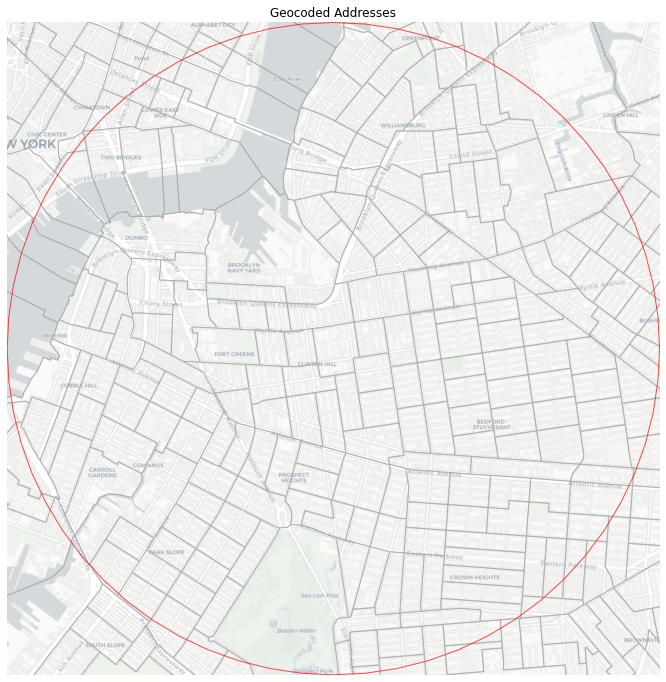

In [56]:
fig, ax = plt.subplots(figsize=(12, 12))


tracts_file.plot(ax=ax, facecolor="none", alpha=0.7, edgecolor='darkgray')# , markersize=100) 

point_buffer.plot(ax=ax, facecolor="none", alpha=0.7, edgecolor='red')

# df.plot(ax=ax, color='lightgrey')


ax.set_xlim(point_buffer.bounds['minx'][0], point_buffer.bounds['maxx'][0])
ax.set_ylim(point_buffer.bounds['miny'][0], point_buffer.bounds['maxy'][0])

ctx.add_basemap(ax, source='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png')

plt.title('Geocoded Addresses')

ax.axis('off')

plt.show();

In [17]:
df.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
tracts_file.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
gdf['int_area'] = gdf.area
gdf['pct_orig_area'] = gdf['int_area'] / gdf['orig_area']
gdf

,address,GEOID_1,STATEFP,COUNTYFP,TRACTCE,GEOID_2,NAME,NAMELSAD,MTFCC,FUNCSTAT,...,INTPTLAT,INTPTLON,B01003_001,state,county,tract,orig_area,geometry,int_area,pct_orig_area
0,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,050100,36047050100,501,Census Tract 501,G5020,S,...,+40.7157350,-073.9489203,3157.0,36,047,050100,0.000018,"POLYGON ((-8232449.598 4970274.838, -8232382.9...",300894.160426,1.634929e+10
1,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,055300,36047055300,553,Census Tract 553,G5020,S,...,+40.7164576,-073.9592358,2761.0,36,047,055300,0.000017,"POLYGON ((-8233444.349 4970479.863, -8233402.3...",272297.411693,1.634947e+10
2,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,055500,36047055500,555,Census Tract 555,G5020,S,...,+40.7180846,-073.9632608,6431.0,36,047,055500,0.000028,"POLYGON ((-8233950.519 4970771.253, -8233932.1...",455969.435757,1.634987e+10
3,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,047700,36047047700,477,Census Tract 477,G5020,S,...,+40.7182181,-073.9421366,3816.0,36,047,047700,0.000023,"POLYGON ((-8231209.626 4971349.315, -8231168.3...",366146.931345,1.577306e+10
4,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,061,002201,36061002201,22.01,Census Tract 22.01,G5020,S,...,+40.7191156,-073.9818443,6484.0,36,061,002201,0.000017,"POLYGON ((-8235914.306 4971163.557, -8235841.6...",281719.119418,1.635012e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,080400,36047080400,804,Census Tract 804,G5020,S,...,+40.6589744,-073.9489902,3217.0,36,047,080400,0.000020,"POLYGON ((-8231806.876 4962231.016, -8232073.8...",163326.086383,8.082939e+09
245,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,081000,36047081000,810,Census Tract 810,G5020,S,...,+40.6591131,-073.9445488,2117.0,36,047,081000,0.000017,"POLYGON ((-8231407.900 4962397.264, -8231611.8...",29768.696604,1.721251e+09
246,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,016900,36047016900,169,Census Tract 169,G5020,S,...,+40.6592927,-073.9812838,4739.0,36,047,016900,0.000022,"POLYGON ((-8235193.810 4962213.146, -8235438.7...",98801.935454,4.429600e+09
247,"200 Willoughby Ave, Brooklyn, NY 11205",36,36,047,079801,36047079801,798.01,Census Tract 798.01,G5020,S,...,+40.6600109,-073.9587186,3023.0,36,047,079801,0.000014,"POLYGON ((-8233275.255 4962574.814, -8232860.4...",225581.170907,1.633562e+10
